In [96]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [97]:
dataset = load_digits()
data = pd.DataFrame(dataset['data'])
data.head(3)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [98]:
target = pd.Series(dataset['target'])
target.shape


(1797,)

In [99]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

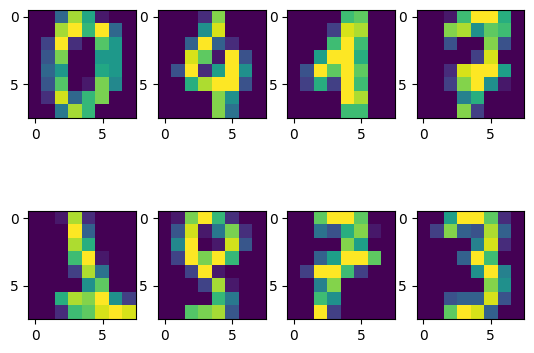

In [100]:
#Generate a scatter plot grid, with 2 rows and 4 columns.
fig, ax = plt.subplots(2,4)

ax[0,0].imshow(data.iloc[0].values.reshape(8,8))
ax[0,1].imshow(data.iloc[100].values.reshape(8,8))
ax[0,2].imshow(data.iloc[200].values.reshape(8,8))
ax[0,3].imshow(data.iloc[300].values.reshape(8,8))

ax[1,0].imshow(data.iloc[1000].values.reshape(8,8))
ax[1,1].imshow(data.iloc[1100].values.reshape(8,8))
ax[1,2].imshow(data.iloc[1200].values.reshape(8,8))
ax[1,3].imshow(data.iloc[1300].values.reshape(8,8))


# KNN

In [101]:
def train(X, y, n):

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X, y)

    return knn


In [102]:
def test(model, X_test, y_test):
  
    score = model.score(X_test, y_test)
    return score

In [103]:
def cross_validate(features, labels, n, n_folds=4):
  
    accuracies = []
    
    kf = KFold(n_splits = n_folds)
    
    for train_idx, test_idx in kf.split(features):
        
        # 'X' as features and 'y' as labels
        X = features.loc[train_idx]
        y = labels.loc[train_idx]
        X_test = features.loc[test_idx]
        y_test = labels.loc[test_idx]
        
        # Train and test the model
        model = train(X, y, n)
        model_score = test(model, X_test, y_test)
        
        # Save each score for further use
        accuracies.append(model_score)
        
    return accuracies

In [104]:
scores = cross_validate(data, target, 3)
print(scores, np.mean(scores))

[0.9577777777777777, 0.9487750556792873, 0.9732739420935412, 0.9710467706013363] 0.9627183865379857


In [105]:
avg_scores = []
neighbors = [1,3,5,7,10,13,16,20,30]
for n in neighbors:
    scores = cross_validate(data, target, n)
    avg_scores.append(np.mean(scores))

print(avg_scores)

[0.9677233358079684, 0.9627183865379857, 0.9627233358079683, 0.9571591190299431, 0.9527097253155159, 0.9510343974263796, 0.9515949022519178, 0.9482566196486019, 0.9393454590447909]


# MLP

In [106]:
# Redefine train(), then we can still use cross_validate()
def train(X, y, n=(100,), learning_rate_init=0.001):
    
    mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=2000, learning_rate_init=0.001)
    mlp.fit(X, y)

    return mlp

In [107]:
def cross_validate(features, labels, n, n_folds=4, learning_rate_init=0.001):
  
    accuracies = []
    
    kf = KFold(n_splits = n_folds)
    
    for train_idx, test_idx in kf.split(features):
        
        # 'X' as features and 'y' as labels
        X = features.loc[train_idx]
        y = labels.loc[train_idx]
        X_test = features.loc[test_idx]
        y_test = labels.loc[test_idx]
        
        # Train and test the model
        model = train(X, y, n, learning_rate_init=learning_rate_init)
        model_score = test(model, X_test, y_test)
        
        # Save each score for later use
        accuracies.append(model_score)
        
    return accuracies

In [108]:
scores = cross_validate(data, target, (10,))
print(scores)
print(np.mean(scores))

[0.9266666666666666, 0.8040089086859689, 0.9220489977728286, 0.8797327394209354]
0.8831143281365998


In [109]:
neurons = [8, 16, 32, 64, 128, 256]

for n in neurons:
    scores = cross_validate(data, target, (n,))
    print(n, np.mean(scores))



8 0.8870193021529325
16 0.9153971789161099
32 0.9315441722345954
64 0.9337800049492699
128 0.9482417718386538
256 0.9571442712199951


In [110]:
#2 hidden layers
for n in neurons:
    scores = cross_validate(data, target, (n, n))
    print(n, np.mean(scores))

8 0.8692167780252412
16 0.9220885919326899
32 0.9354404850284583
64 0.9398886414253899
128 0.9493603068547389
256 0.9582578569660976


In [111]:
#3 hidden layers
neurons = [10, 64, 128]
n_folds = 6

for n in neurons:
    scores = cross_validate(data, target, (n, n, n), n_folds=n_folds)
    print(n, np.mean(scores))

10 0.914308807134894
64 0.9482367149758454
128 0.9554905239687849
